In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import sympy

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }
plt.rcParams.update(parameters)


In [3]:
# sympy.solve()



In [133]:
t = np.linspace(0, 50, 1000)
eps, b, d, r = 1/61, 0.182, 1/4.5, 2
V = 20 # sqr mtr
omega = np.sqrt(d*r)
print(2*np.pi/omega)
P_eq, N_eq = r/b, d/(eps*b)
eq = (P_eq, N_eq)
print(eq)
def deriv(state, t, *params):
    eps, b, d, r = params
    P, N = state
    dP_dt = eps*b*N*P - d*P
    dN_dt = r*N - b*N*P
    return np.array([dP_dt, dN_dt])

state_init = (100/V, 1e3/V)
params = (eps, b, d, r)
num_sol = odeint(deriv, state_init, t, args=params).T
P, N = num_sol

fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
ax.plot(t, P*V, label="Predator")
ax.plot(t, N*V, label="Pray")
ax.set_xlabel("t [year]")
ax.legend()

9.42477796076938
(10.989010989010989, 74.48107448107447)


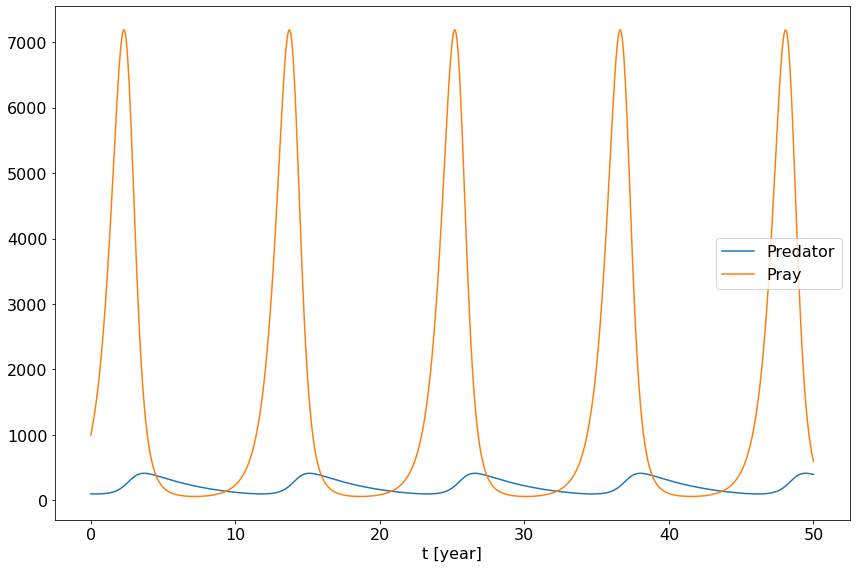

No handles with labels found to put in legend.


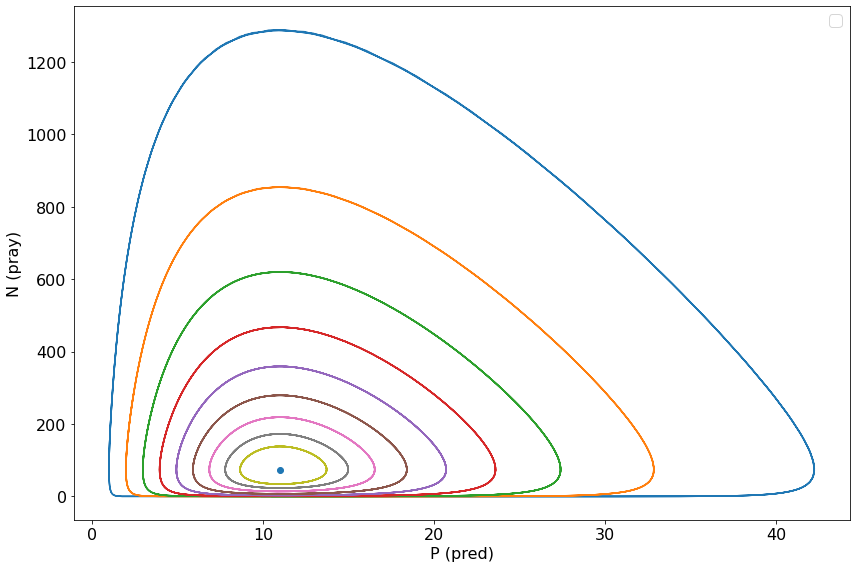

In [137]:
fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
for p in range(20, 200, 20):
    state_init = (p/V, 1e3/V)
    params = (eps, b, d, r)
    num_sol = odeint(deriv, state_init, t, args=params).T
    P, N = num_sol
    ax.plot(P, N)
ax.scatter(*eq)
ax.set_ylabel("N (pray)")
ax.set_xlabel("P (pred)")
ax.legend()

/usr/lib/python3/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


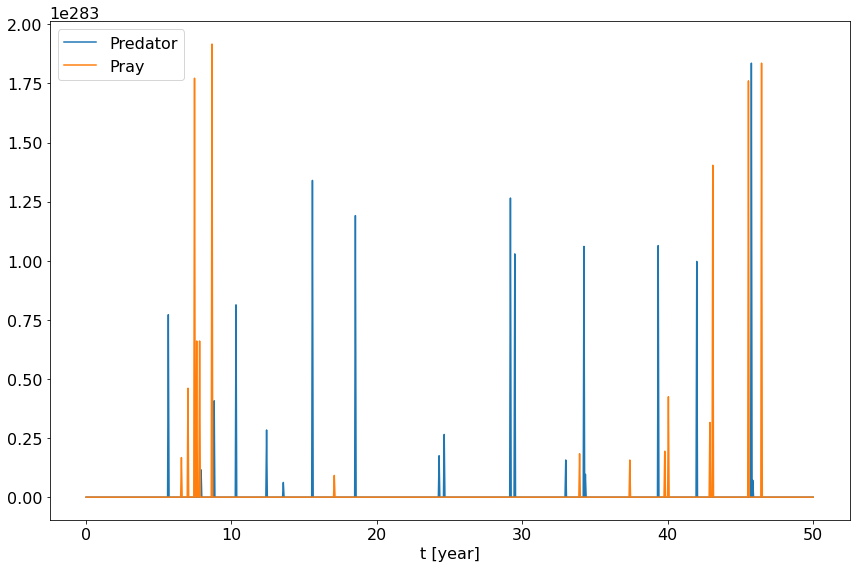

In [168]:
step = lambda x: int(x>0)

def deriv(state, t, *params):
    eps, b, d, r = params
    u, k = 1, 100
    P, N = state
    dP_dt = eps*b*N*P - d*P - u*step(P-N)*P
    dN_dt = r*N - b*N*P
    return np.array([dP_dt, dN_dt])

state_init = (100/V, 1e3/V)
params = (eps, b, d, r)
num_sol = odeint(deriv, state_init, t, args=params).T
P, N = num_sol

fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
ax.plot(t, P*V, label="Predator")
ax.plot(t, N*V, label="Pray")
ax.set_xlabel("t [year]")
ax.legend()

Text(0.5, 0, 'P (pred)')

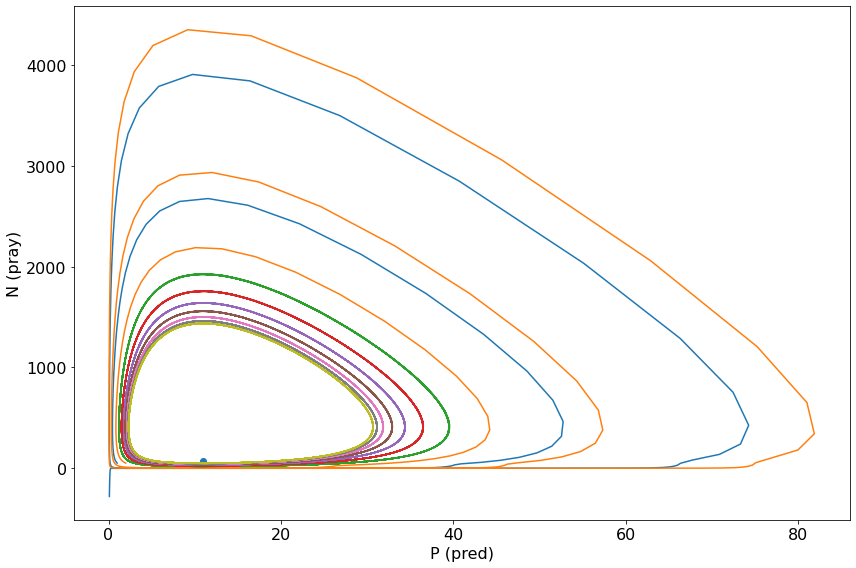

In [165]:
fig, ax = plt.subplots(1,1, figsize=(12, 8), tight_layout=True)
for p in range(20, 200, 20):
    state_init = (p/V, 1e3/V)
    params = (eps, b, d, r)
    num_sol = odeint(deriv, state_init, t, args=params).T
    P, N = num_sol
    ax.plot(P, N)
ax.scatter(*eq)
ax.set_ylabel("N (pray)")
ax.set_xlabel("P (pred)")
# ax.legend()